In [1]:
library(org.Xl.eg.db, quietly = TRUE, warn.conflicts = FALSE)#make symbol into gene id
library(limma, quietly = TRUE, warn.conflicts = FALSE)#make alias into symbol or correct gene id
library(dplyr, quietly = TRUE, warn.conflicts = FALSE)


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname






In [2]:
org.Xl.eg.db


Please see: help('select') for usage information



OrgDb object:
| DBSCHEMAVERSION: 2.1
| Db type: OrgDb
| Supporting package: AnnotationDbi
| DBSCHEMA: XENOPUS_DB
| ORGANISM: Xenopus laevis
| SPECIES: Xenopus
| EGSOURCEDATE: 2023-Sep11
| EGSOURCENAME: Entrez Gene
| EGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| CENTRALID: EG
| TAXID: 8355
| GOSOURCENAME: Gene Ontology
| GOSOURCEURL: http://current.geneontology.org/ontology/go-basic.obo
| GOSOURCEDATE: 2023-07-27
| GOEGSOURCEDATE: 2023-Sep11
| GOEGSOURCENAME: Entrez Gene
| GOEGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| KEGGSOURCENAME: KEGG GENOME
| KEGGSOURCEURL: ftp://ftp.genome.jp/pub/kegg/genomes
| KEGGSOURCEDATE: 2011-Mar15

# Read file

In [3]:
#the file generated by "Gene expression with paper method.ipynb"
group_1_genes_name <- read.delim("Data by Ding Yang/group_1_gene.txt")
group_2_genes_name <- read.delim("Data by Ding Yang/group_2_gene.txt")
background <- read.delim("Data by Ding Yang/background_for_GO.txt")

In [4]:
library(IRdisplay)
library('DT')

print(paste("group_1 has:",nrow(group_1_genes_name),"genes")) 
print(paste("group_2 has:",nrow(group_2_genes_name),"genes"))
print(paste("background has:",nrow(background),"genes"))

display_1 <- data.frame('genes' = as.data.frame(group_1_genes_name),
                        'group' = "group_1")
colnames(display_1)<- c('genes', 'group')

           
display_2 <- data.frame('genes' = as.data.frame(group_2_genes_name),
                        'group' = "group_2")

colnames(display_2)<- c('genes', 'group')

display_1 <- rbind(display_1,display_2)

m = datatable(display_1, options = list(pageLength = 5))

saveWidget(m, 'demo.html', selfcontained = FALSE)
display_html('<iframe src="demo.html" width=100% height=400></iframe>')

[1] "group_1 has: 782 genes"
[1] "group_2 has: 424 genes"
[1] "background has: 2601 genes"


# Make gene name into ID

## group 1

In [5]:
alias2SymbolTable(unlist(group_1_genes_name), species = "Xl")

Warning message in alias2SymbolTable(unlist(group_1_genes_name), species = "Xl"):
“Multiple symbols ignored for one or more aliases”


[1] "atp2a2.S"     "gata2.L"      "srsf5.L"      "trim29.L"     "esrp1.L"     
  [6] NA             "eif4a1.L"     "dll1.L"       "krt70.L"      "myef2.S"     
 [11] "eif4a1.S"     NA             "has1.S"       "dlx3.S"       NA            
 [16] "foxi1.L"      "ilf3.S"       "srrt.L"       "tfap2a.S"     "myef2.L"     
 [21] "znf346.S"     "lasp1.L"      "rpl4.L"       "klf5.L"       "dvl3.L"      
 [26] "faf2.S"       "rpl37a.L"     NA             "foxi1.S"      "pdia3.S"     
 [31] "purb.L"       "hypk.S"       "mab21l3.S"    "grhl3.L"      "rpl26.S"     
 [36] "rpl6.S"       "rsbn1l.S"     "ilf3.L"       "rps2.L"       "mfap1.L"     
 [41] NA             NA             "elf1.S"       "rps16.S"      "gata2.S"     
 [46] "fgfr4.S"      "polr2a.S"     "ppia.L"       "hnrnpab.S"    "mtdh.L"      
 [51] "bsg.S"        "khsrp.S"      "wdr83os.L"    "snrpf.S"      "sltm.L"      
 [56] "btg1.S"       "mtdh.S"       "ahnak.L"      "rpl18a.S"     "hnrnpa0.S"   
 [61] "ppdpf.L"      "dsp.S"        "hnrnph1.S"    "dll1.S"       "arvcf.S"     
 [66] "ppig.L"       "anxa4.L"      "tfap2a.L"     "stambp.L"     "ddx39a.L"    
 [71] "krt7.S"       "arid2.S"      "eif3g.S"      "pim1.S"       "hdlbp.L"     
 [76] "eif3j.S"      "cldn7.L"      "mat2a.L"      "rassf3.L"     "ptbp1.S"     
 [81] "ddx27.L"      NA             "rpl17.S"      "tubb4a.S"     "srp19.S"     
 [86] "zbed4.S"      "yeats4.S"     "trim29.S"     NA             "cldn4.L"     
 [91] "dlc.L"        "zbtb10.L"     "galnt10.L"    "llph.S"       "grhl1.S"     
 [96] "gatm.L"       "sltm.S"       "rps20.S"      "taf3.L"       "clint1.S"    
[101] "kat6a.L"      "smarca4.S"    "elf1.L"       "twsg1.L"      NA            
[106] "emp2.L"       "clptm1.L"     "bpgm.L"       "ranbp1.S"     "celsr1.L"    
[111] NA             "fzd6.L"       "eif4g1.S"     "chd2.L"       "selenos.L"   
[116] "rbm47.S"      "grhl3.S"      "btg1.L"       "slc22a5.L"    "capns1.L"    
[121] "chd1.S"       "mapk6.S"      "atf4.L"       "krt12.5.S"    "slc22a4.L"   
[126] "ccnb2.S"      "srsf5.S"      "atp5f1a.S"    "arid3b.L"     "csnk1a1.S"   
[131] "tfap2c.L"     NA             "dsp.L"        "bmp7.2.L"     "ctdspl2.L"   
[136] "hspa8.L"      "tia1.L"       "hdlbp.S"      "rpn1.L"       "atp6v1c2.L"  
[141] "azin2.S"      "brd4.L"       "krt8.1.L"     "ier2.S"       "hdgf.L"      
[146] NA             "zbed4.L"      "anxa2.S"      "calu.S"       "rpl4.S"      
[151] "rplp0.L"      "nhp2.S"       "zswim4.L"     "rps23.S"      "net1.L"      
[156] "ccnb2.L"      "esrp1.S"      "eppk1.L"      NA             "tdg.S"       
[161] NA             "lzts2.S"      "hmx3.L"       "has-rs.S"     "ano9.L"      
[166] "tnpo3.L"      "ptgs2.S"      "fam3b.L"      NA             "kitlg.S"     
[171] "tmed9.S"      "ap1s1.L"      "znf238.2.L"   "notch3.L"     "hal.1.L"     
[176] "kin.S"        "slc7a4.L"     "golgb1.S"     "pabpc1.S"     "bmp4.L"      
[181] "thrap3.S"     "capn1.L"      "sec61a1.S"    "rpl3.L"       "clip1.L"     
[186] NA             "rsl24d1.S"    "creb3l2.L"    "rpl6.L"       "pdia6.S"     
[191] "klf6.L"       "hsph1.S"      "mphosph10.L"  "nrf1.L"       "bambi.S"     
[196] "tram1.S"      "prelid1.S"    "tox3.L"       "mtus1.L"      "shroom4.L"   
[201] "klf5.S"       "rbm28.L"      "dlx3.L"       "tnpo3.S"      NA            
[206] "mak16.L"      "klf2.S"       "ubap2.S"      "grhl1.L"      "gadd45gip1.S"
[211] "sfswap.S"     "kmt2e.S"      "mcrs1.S"      "nop16.S"      NA            
[216] "snrnp200.L"   "hypk.L"       "rasal1.L"     "hnrnpk.S"     "ier5l.S"     
[221] "mpdu1.L"      "cystm1.S"     "cxcl12.L"     "trir.S"       "fam174b.L"   
[226] "selenos.S"    "ncl.S"        "ier2.L"       "tcf7l1.L"     "esrrg.L"     
[231] "srrm2.L"      "lrrc8e.L"     "aurkb.L"      "znf750.L"     "arl1.S"      
[236] "nop58.L"      "c3h5orf15.S"  "arid3a.S"     "cdc42ep4.S"   "ticrr.L"     
[241] "actn1.L"      "brix1.S"      "eif3c.L"      "cbll1.S"      "ppan.L"      
[246] "comt.2.S"     "bsg.L"     

In [6]:
group_1_genes_name<- cbind(as.data.frame(group_1_genes_name),as.data.frame(alias2SymbolTable(unlist(group_1_genes_name), species = "Xl")))

colnames(group_1_genes_name) <- c('Alias', 'Symbol')

na_list <- row.names(group_1_genes_name[is.na(group_1_genes_name$Symbol),])
group_1_genes_name
na_list

Warning message in alias2SymbolTable(unlist(group_1_genes_name), species = "Xl"):
“Multiple symbols ignored for one or more aliases”


Alias,Symbol
<chr>,<chr>
atp2a2.S,atp2a2.S
gata2.L,gata2.L
srsf5.L,srsf5.L
trim29.L,trim29.L
esrp1.L,esrp1.L
gfpt1.L,NA
eif4a1.L,eif4a1.L
dll1.L,dll1.L
krt.S,krt70.L


[1] "6"   "12"  "15"  "28"  "41"  "42"  "82"  "89"  "105" "111" "132" "146"
 [13] "159" "161" "169" "186" "205" "215" "249" "253" "262" "266" "269" "270"
 [25] "271" "277" "311" "332" "333" "334" "338" "343" "345" "350" "354" "365"
 [37] "366" "375" "383" "395" "409" "413" "422" "428" "433" "435" "441" "452"
 [49] "454" "456" "468" "470" "473" "483" "491" "501" "505" "513" "514" "515"
 [61] "518" "521" "538" "547" "551" "561" "565" "567" "569" "581" "582" "587"
 [73] "597" "598" "607" "609" "610" "613" "616" "618" "621" "630" "651" "663"
 [85] "670" "678" "686" "687" "688" "714" "715" "717" "726" "728" "731" "736"
 [97] "741" "755" "756" "762" "768" "782"

In [7]:
group_1_genes_name <- replace(group_1_genes_name, is.na(group_1_genes_name), "")

num = list()
for (i in 1:nrow(group_1_genes_name)) {    
    if(group_1_genes_name[i,1]!= group_1_genes_name[i,2]) {
        num <- append(num, i)
  }
}
nrow(data.frame(na_list))
group_1_genes_name[unlist(num),]

[1] 102

,Alias,Symbol
,<chr>,<chr>
6,gfpt1.L,
9,krt.S,krt70.L
12,Xelaev18000774m.g,
15,mgc75753.L,
28,atp2a2.L,
41,plscr1.S,
42,Xelaev18045649m.g,
71,krt5.7.S,krt7.S
82,hspa8.S,


In [8]:
data.frame(na_list)

na_list
<chr>
6
12
15
28
41
42
82
89
105


In [9]:
group_1_genes_name$Symbol

[1] "atp2a2.S"     "gata2.L"      "srsf5.L"      "trim29.L"     "esrp1.L"     
  [6] ""             "eif4a1.L"     "dll1.L"       "krt70.L"      "myef2.S"     
 [11] "eif4a1.S"     ""             "has1.S"       "dlx3.S"       ""            
 [16] "foxi1.L"      "ilf3.S"       "srrt.L"       "tfap2a.S"     "myef2.L"     
 [21] "znf346.S"     "lasp1.L"      "rpl4.L"       "klf5.L"       "dvl3.L"      
 [26] "faf2.S"       "rpl37a.L"     ""             "foxi1.S"      "pdia3.S"     
 [31] "purb.L"       "hypk.S"       "mab21l3.S"    "grhl3.L"      "rpl26.S"     
 [36] "rpl6.S"       "rsbn1l.S"     "ilf3.L"       "rps2.L"       "mfap1.L"     
 [41] ""             ""             "elf1.S"       "rps16.S"      "gata2.S"     
 [46] "fgfr4.S"      "polr2a.S"     "ppia.L"       "hnrnpab.S"    "mtdh.L"      
 [51] "bsg.S"        "khsrp.S"      "wdr83os.L"    "snrpf.S"      "sltm.L"      
 [56] "btg1.S"       "mtdh.S"       "ahnak.L"      "rpl18a.S"     "hnrnpa0.S"   
 [61] "ppdpf.L"      "dsp.S"        "hnrnph1.S"    "dll1.S"       "arvcf.S"     
 [66] "ppig.L"       "anxa4.L"      "tfap2a.L"     "stambp.L"     "ddx39a.L"    
 [71] "krt7.S"       "arid2.S"      "eif3g.S"      "pim1.S"       "hdlbp.L"     
 [76] "eif3j.S"      "cldn7.L"      "mat2a.L"      "rassf3.L"     "ptbp1.S"     
 [81] "ddx27.L"      ""             "rpl17.S"      "tubb4a.S"     "srp19.S"     
 [86] "zbed4.S"      "yeats4.S"     "trim29.S"     ""             "cldn4.L"     
 [91] "dlc.L"        "zbtb10.L"     "galnt10.L"    "llph.S"       "grhl1.S"     
 [96] "gatm.L"       "sltm.S"       "rps20.S"      "taf3.L"       "clint1.S"    
[101] "kat6a.L"      "smarca4.S"    "elf1.L"       "twsg1.L"      ""            
[106] "emp2.L"       "clptm1.L"     "bpgm.L"       "ranbp1.S"     "celsr1.L"    
[111] ""             "fzd6.L"       "eif4g1.S"     "chd2.L"       "selenos.L"   
[116] "rbm47.S"      "grhl3.S"      "btg1.L"       "slc22a5.L"    "capns1.L"    
[121] "chd1.S"       "mapk6.S"      "atf4.L"       "krt12.5.S"    "slc22a4.L"   
[126] "ccnb2.S"      "srsf5.S"      "atp5f1a.S"    "arid3b.L"     "csnk1a1.S"   
[131] "tfap2c.L"     ""             "dsp.L"        "bmp7.2.L"     "ctdspl2.L"   
[136] "hspa8.L"      "tia1.L"       "hdlbp.S"      "rpn1.L"       "atp6v1c2.L"  
[141] "azin2.S"      "brd4.L"       "krt8.1.L"     "ier2.S"       "hdgf.L"      
[146] ""             "zbed4.L"      "anxa2.S"      "calu.S"       "rpl4.S"      
[151] "rplp0.L"      "nhp2.S"       "zswim4.L"     "rps23.S"      "net1.L"      
[156] "ccnb2.L"      "esrp1.S"      "eppk1.L"      ""             "tdg.S"       
[161] ""             "lzts2.S"      "hmx3.L"       "has-rs.S"     "ano9.L"      
[166] "tnpo3.L"      "ptgs2.S"      "fam3b.L"      ""             "kitlg.S"     
[171] "tmed9.S"      "ap1s1.L"      "znf238.2.L"   "notch3.L"     "hal.1.L"     
[176] "kin.S"        "slc7a4.L"     "golgb1.S"     "pabpc1.S"     "bmp4.L"      
[181] "thrap3.S"     "capn1.L"      "sec61a1.S"    "rpl3.L"       "clip1.L"     
[186] ""             "rsl24d1.S"    "creb3l2.L"    "rpl6.L"       "pdia6.S"     
[191] "klf6.L"       "hsph1.S"      "mphosph10.L"  "nrf1.L"       "bambi.S"     
[196] "tram1.S"      "prelid1.S"    "tox3.L"       "mtus1.L"      "shroom4.L"   
[201] "klf5.S"       "rbm28.L"      "dlx3.L"       "tnpo3.S"      ""            
[206] "mak16.L"      "klf2.S"       "ubap2.S"      "grhl1.L"      "gadd45gip1.S"
[211] "sfswap.S"     "kmt2e.S"      "mcrs1.S"      "nop16.S"      ""            
[216] "snrnp200.L"   "hypk.L"       "rasal1.L"     "hnrnpk.S"     "ier5l.S"     
[221] "mpdu1.L"      "cystm1.S"     "cxcl12.L"     "trir.S"       "fam174b.L"   
[226] "selenos.S"    "ncl.S"        "ier2.L"       "tcf7l1.L"     "esrrg.L"     
[231] "srrm2.L"      "lrrc8e.L"     "aurkb.L"      "znf750.L"     "arl1.S"      
[236] "nop58.L"      "c3h5orf15.S"  "arid3a.S"     "cdc42ep4.S"   "ticrr.L"     
[241] "actn1.L"      "brix1.S"      "eif3c.L"      "cbll1.S"      "ppan.L"      
[246] "comt.2.S"     "bsg.L"     

In [10]:
Symbol<-AnnotationDbi::select(org.Xl.eg.db,keys = group_1_genes_name$Symbol, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')
Alias<-AnnotationDbi::select(org.Xl.eg.db,keys = group_1_genes_name$Alias, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')
group_1_genes_name<-cbind(Symbol,Alias)

colnames(group_1_genes_name) <- c('Symbol', 'ENTREZID','Alias','ENTREZID')
group_1_genes_name

'select()' returned many:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



Symbol,ENTREZID,Alias,ENTREZID
<chr>,<chr>,<chr>,<chr>
atp2a2.S,446229,atp2a2.S,446229
gata2.L,399273,gata2.L,399273
srsf5.L,108699194,srsf5.L,108699194
trim29.L,379262,trim29.L,379262
esrp1.L,379211,esrp1.L,379211
,NA,gfpt1.L,NA
eif4a1.L,443739,eif4a1.L,443739
dll1.L,100337564,dll1.L,100337564
krt70.L,380402,krt.S,NA


In [11]:
for (i in 1:nrow(group_1_genes_name)) {    
    if(group_1_genes_name[i,1]== '') {
        group_1_genes_name$rename[i] <- sapply(strsplit(group_1_genes_name[i,3], split='.', fixed=TRUE), function(x) (x[1]))

                                            }
    else{
    group_1_genes_name$rename[i] <- group_1_genes_name[i,3]
    }
}

group_1_genes_name[na_list,]

,Symbol,ENTREZID,Alias,ENTREZID,rename
,<chr>,<chr>,<chr>,<chr>,<chr>
6,,NA,gfpt1.L,NA,gfpt1
12,,NA,Xelaev18000774m.g,NA,Xelaev18000774m
15,,NA,mgc75753.L,NA,mgc75753
28,,NA,atp2a2.L,NA,atp2a2
41,,NA,plscr1.S,NA,plscr1
42,,NA,Xelaev18045649m.g,NA,Xelaev18045649m
82,,NA,hspa8.S,NA,hspa8
89,,NA,c20orf27.L,NA,c20orf27
105,,NA,Xelaev18019056m.g,NA,Xelaev18019056m


In [12]:
rename<- cbind(as.data.frame(group_1_genes_name$rename),as.data.frame(alias2SymbolTable(group_1_genes_name$rename, species = "Xl")))
colnames(rename) <- c('Alias', 'Symbol')

Warning message in alias2SymbolTable(group_1_genes_name$rename, species = "Xl"):
“Multiple symbols ignored for one or more aliases”


In [13]:
rename[is.na(rename$Symbol),]

,Alias,Symbol
,<chr>,<chr>
12,Xelaev18000774m,NA
15,mgc75753,NA
42,Xelaev18045649m,NA
105,Xelaev18019056m,NA
111,Xelaev18021438m,NA
132,Xelaev18012293m,NA
146,LOC100145611,NA
169,LOC101731452,NA
186,Xelaev18040968m,NA


In [14]:
rename[na_list,]

,Alias,Symbol
,<chr>,<chr>
6,gfpt1,gfpt2.L
12,Xelaev18000774m,NA
15,mgc75753,NA
28,atp2a2,atp2a1.S
41,plscr1,plscr1.L
42,Xelaev18045649m,NA
82,hspa8,hspa8.L
89,c20orf27,adissp.S
105,Xelaev18019056m,NA


In [15]:
group_1_genes_name<-cbind(group_1_genes_name,rename$Symbol)

colnames(group_1_genes_name) <-  c('Symbol', 'sy_ENTREZID','Alias','al_ENTREZID','re_Alias','re_Symbol' )

group_1_genes_name

Symbol,sy_ENTREZID,Alias,al_ENTREZID,re_Alias,re_Symbol
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
atp2a2.S,446229,atp2a2.S,446229,atp2a2.S,atp2a2.S
gata2.L,399273,gata2.L,399273,gata2.L,gata2.L
srsf5.L,108699194,srsf5.L,108699194,srsf5.L,srsf5.L
trim29.L,379262,trim29.L,379262,trim29.L,trim29.L
esrp1.L,379211,esrp1.L,379211,esrp1.L,esrp1.L
,NA,gfpt1.L,NA,gfpt1,gfpt2.L
eif4a1.L,443739,eif4a1.L,443739,eif4a1.L,eif4a1.L
dll1.L,100337564,dll1.L,100337564,dll1.L,dll1.L
krt70.L,380402,krt.S,NA,krt.S,krt70.L


In [16]:
re_Symbol<-AnnotationDbi::select(org.Xl.eg.db,keys = group_1_genes_name$re_Symbol, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')

re_Symbol <- re_Symbol$ENTREZID

group_1_genes_name<-cbind(group_1_genes_name,re_Symbol)

colnames(group_1_genes_name) <-  c('Symbol', 'sy_ENTREZID','Alias','al_ENTREZID','re_Alias','re_Symbol' ,'re_ENTREZID')
group_1_genes_name

'select()' returned many:1 mapping between keys and columns



Symbol,sy_ENTREZID,Alias,al_ENTREZID,re_Alias,re_Symbol,re_ENTREZID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
atp2a2.S,446229,atp2a2.S,446229,atp2a2.S,atp2a2.S,446229
gata2.L,399273,gata2.L,399273,gata2.L,gata2.L,399273
srsf5.L,108699194,srsf5.L,108699194,srsf5.L,srsf5.L,108699194
trim29.L,379262,trim29.L,379262,trim29.L,trim29.L,379262
esrp1.L,379211,esrp1.L,379211,esrp1.L,esrp1.L,379211
,NA,gfpt1.L,NA,gfpt1,gfpt2.L,380175
eif4a1.L,443739,eif4a1.L,443739,eif4a1.L,eif4a1.L,443739
dll1.L,100337564,dll1.L,100337564,dll1.L,dll1.L,100337564
krt70.L,380402,krt.S,NA,krt.S,krt70.L,380402


## Group 2

In [17]:
group_2_genes_name<- cbind(as.data.frame(group_2_genes_name),as.data.frame(alias2SymbolTable(unlist(group_2_genes_name), species = "Xl")))

colnames(group_2_genes_name) <- c('Alias', 'Symbol')

na_list <- row.names(group_2_genes_name[is.na(group_2_genes_name$Symbol),])
group_2_genes_name
na_list

Warning message in alias2SymbolTable(unlist(group_2_genes_name), species = "Xl"):
“Multiple symbols ignored for one or more aliases”


Alias,Symbol
<chr>,<chr>
etv1.S,etv1.S
tpbg.L,tpbg.L
nox1.L,nox1.L
ngfr.L,ngfr.L
cdx2.S,cdx2.S
cdx4.L,cdx4.L
itm2a.L,itm2a.L
ngfr.S,ngfr.S
phldb1.L,phldb1.L


[1] "17"  "18"  "19"  "20"  "21"  "23"  "30"  "38"  "41"  "43"  "48"  "49" 
[13] "51"  "53"  "57"  "61"  "65"  "69"  "71"  "76"  "81"  "89"  "96"  "106"
[25] "110" "115" "118" "121" "125" "129" "143" "147" "168" "171" "177" "180"
[37] "184" "203" "209" "226" "231" "233" "234" "236" "237" "243" "252" "255"
[49] "265" "272" "281" "287" "288" "291" "295" "304" "311" "317" "320" "322"
[61] "324" "341" "346" "347" "356" "360" "364" "368" "373" "380" "387" "390"
[73] "398" "407" "408" "412" "417"

In [18]:
group_2_genes_name <- replace(group_2_genes_name, is.na(group_2_genes_name), "")

num = list()
for (i in 1:nrow(group_2_genes_name)) {    
    if(group_2_genes_name[i,1]!= group_2_genes_name[i,2]) {
        num <- append(num, i)
  }
}
group_2_genes_name[unlist(num),]

,Alias,Symbol
,<chr>,<chr>
17,loc728026.L,
18,etv1.L,
19,Xelaev18002122m.g,
20,apoc1-like.L,
21,Xelaev18000010m.g,
23,Xelaev18039162m.g,
30,Xelaev18047214m.g,
33,tdgf1.3.L,cripto.3.L
38,LOC100490274.S,


In [19]:
group_2_genes_name

Alias,Symbol
<chr>,<chr>
etv1.S,etv1.S
tpbg.L,tpbg.L
nox1.L,nox1.L
ngfr.L,ngfr.L
cdx2.S,cdx2.S
cdx4.L,cdx4.L
itm2a.L,itm2a.L
ngfr.S,ngfr.S
phldb1.L,phldb1.L


In [20]:
Symbol<-AnnotationDbi::select(org.Xl.eg.db,keys = group_2_genes_name$Symbol, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')
Alias<-AnnotationDbi::select(org.Xl.eg.db,keys = group_2_genes_name$Alias, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')
group_2_genes_name<-cbind(Symbol,Alias)

colnames(group_2_genes_name) <- c('Symbol', 'ENTREZID','Alias','ENTREZID')

group_2_genes_name

'select()' returned many:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



Symbol,ENTREZID,Alias,ENTREZID
<chr>,<chr>,<chr>,<chr>
etv1.S,398358,etv1.S,398358
tpbg.L,108716900,tpbg.L,108716900
nox1.L,108698286,nox1.L,108698286
ngfr.L,398129,ngfr.L,398129
cdx2.S,397753,cdx2.S,397753
cdx4.L,380412,cdx4.L,380412
itm2a.L,432328,itm2a.L,432328
ngfr.S,373821,ngfr.S,373821
phldb1.L,108696447,phldb1.L,108696447


In [21]:
for (i in 1:nrow(group_2_genes_name)) {    
    if(group_2_genes_name[i,1]== '') {
        group_2_genes_name$rename[i] <- sapply(strsplit(group_2_genes_name[i,3], split='.', fixed=TRUE), function(x) (x[1]))

                                            }
    else{
    group_2_genes_name$rename[i] <- group_2_genes_name[i,3]
    }
}

group_2_genes_name[na_list,]

,Symbol,ENTREZID,Alias,ENTREZID,rename
,<chr>,<chr>,<chr>,<chr>,<chr>
17,,NA,loc728026.L,NA,loc728026
18,,NA,etv1.L,NA,etv1
19,,NA,Xelaev18002122m.g,NA,Xelaev18002122m
20,,NA,apoc1-like.L,NA,apoc1-like
21,,NA,Xelaev18000010m.g,NA,Xelaev18000010m
23,,NA,Xelaev18039162m.g,NA,Xelaev18039162m
30,,NA,Xelaev18047214m.g,NA,Xelaev18047214m
38,,NA,LOC100490274.S,NA,LOC100490274
41,,NA,Xelaev18010085m.g,NA,Xelaev18010085m


In [22]:
rename<- cbind(as.data.frame(group_2_genes_name$rename),as.data.frame(alias2SymbolTable(group_2_genes_name$rename, species = "Xl")))
colnames(rename) <- c('Alias', 'Symbol')

Warning message in alias2SymbolTable(group_2_genes_name$rename, species = "Xl"):
“Multiple symbols ignored for one or more aliases”


In [23]:
nrow(rename[is.na(rename$Symbol),])

nrow(rename[na_list,])

[1] 68

[1] 77

In [24]:
group_2_genes_name<-cbind(group_2_genes_name,rename$Symbol)

colnames(group_2_genes_name) <-  c('Symbol', 'sy_ENTREZID','Alias','al_ENTREZID','re_Alias','re_Symbol' )

group_2_genes_name

Symbol,sy_ENTREZID,Alias,al_ENTREZID,re_Alias,re_Symbol
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
etv1.S,398358,etv1.S,398358,etv1.S,etv1.S
tpbg.L,108716900,tpbg.L,108716900,tpbg.L,tpbg.L
nox1.L,108698286,nox1.L,108698286,nox1.L,nox1.L
ngfr.L,398129,ngfr.L,398129,ngfr.L,ngfr.L
cdx2.S,397753,cdx2.S,397753,cdx2.S,cdx2.S
cdx4.L,380412,cdx4.L,380412,cdx4.L,cdx4.L
itm2a.L,432328,itm2a.L,432328,itm2a.L,itm2a.L
ngfr.S,373821,ngfr.S,373821,ngfr.S,ngfr.S
phldb1.L,108696447,phldb1.L,108696447,phldb1.L,phldb1.L


In [25]:
re_Symbol<-AnnotationDbi::select(org.Xl.eg.db,keys = group_2_genes_name$re_Symbol, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')

re_Symbol <- re_Symbol$ENTREZID

group_2_genes_name<-cbind(group_2_genes_name,re_Symbol)

colnames(group_2_genes_name) <-  c('Symbol', 'sy_ENTREZID','Alias','al_ENTREZID','re_Alias','re_Symbol' ,'re_ENTREZID')

'select()' returned many:1 mapping between keys and columns



In [26]:
nrow(group_2_genes_name[is.na(group_2_genes_name$re_ENTREZID),])

[1] 68

# background

In [27]:
background<- cbind(as.data.frame(background),as.data.frame(alias2SymbolTable(unlist(background), species = "Xl")))

colnames(background) <- c('Alias', 'Symbol')

na_list <- row.names(background[is.na(background$Symbol),])
background
na_list

Warning message in alias2SymbolTable(unlist(background), species = "Xl"):
“Multiple symbols ignored for one or more aliases”


Alias,Symbol
<chr>,<chr>
eif4a1.S,eif4a1.S
krt.S,krt70.L
foxi1.S,foxi1.S
eif4a1.L,eif4a1.L
Xelaev18000774m.g,NA
gata2.L,gata2.L
foxi1.L,foxi1.L
Xelaev18038704m.g,NA
krt12.S,krt12.5.S


[1] "5"    "8"    "10"   "11"   "14"   "15"   "16"   "17"   "28"   "29"  
 [11] "30"   "33"   "37"   "50"   "54"   "56"   "59"   "79"   "83"   "95"  
 [21] "99"   "100"  "105"  "110"  "111"  "113"  "117"  "119"  "126"  "130" 
 [31] "131"  "139"  "148"  "150"  "151"  "152"  "164"  "176"  "177"  "179" 
 [41] "181"  "183"  "212"  "216"  "218"  "221"  "227"  "230"  "237"  "242" 
 [51] "243"  "245"  "247"  "254"  "255"  "269"  "278"  "287"  "292"  "298" 
 [61] "303"  "318"  "319"  "326"  "332"  "334"  "337"  "348"  "356"  "359" 
 [71] "363"  "379"  "382"  "385"  "390"  "392"  "401"  "407"  "408"  "422" 
 [81] "425"  "426"  "429"  "430"  "431"  "440"  "443"  "445"  "449"  "452" 
 [91] "456"  "463"  "472"  "478"  "499"  "500"  "502"  "505"  "516"  "517" 
[101] "519"  "527"  "534"  "540"  "542"  "543"  "544"  "545"  "548"  "550" 
[111] "556"  "560"  "564"  "567"  "569"  "572"  "574"  "575"  "578"  "613" 
[121] "622"  "623"  "627"  "633"  "640"  "641"  "654"  "663"  "667"  "676" 
[131] "677"  "681"  "683"  "690"  "698"  "709"  "714"  "720"  "722"  "729" 
[141] "730"  "739"  "742"  "744"  "750"  "754"  "763"  "764"  "771"  "772" 
[151] "778"  "780"  "783"  "790"  "795"  "798"  "799"  "801"  "803"  "804" 
[161] "807"  "815"  "816"  "819"  "820"  "841"  "842"  "845"  "858"  "863" 
[171] "866"  "868"  "875"  "879"  "887"  "893"  "908"  "909"  "915"  "919" 
[181] "921"  "927"  "932"  "934"  "937"  "938"  "956"  "962"  "963"  "964" 
[191] "966"  "975"  "976"  "998"  "1036" "1040" "1041" "1043" "1045" "1046"
[201] "1062" "1064" "1071" "1073" "1081" "1089" "1090" "1102" "1105" "1112"
[211] "1113" "1115" "1119" "1124" "1135" "1137" "1138" "1142" "1143" "1144"
[221] "1149" "1162" "1173" "1174" "1185" "1189" "1191" "1193" "1201" "1208"
[231] "1215" "1217" "1222" "1229" "1230" "1244" "1256" "1261" "1266" "1268"
[241] "1289" "1293" "1296" "1298" "1301" "1308" "1317" "1322" "1323" "1325"
[251] "1326" "1332" "1343" "1347" "1349" "1357" "1364" "1367" "1371" "1388"
[261] "1395" "1396" "1398" "1427" "1430" "1435" "1436" "1445" "1446" "1454"
[271] "1458" "1467" "1472" "1473" "1476" "1477" "1480" "1493" "1494" "1496"
[281] "1502" "1505" "1518" "1523" "1526" "1531" "1533" "1538" "1540" "1541"
[291] "1548" "1552" "1559" "1565" "1571" "1573" "1580" "1581" "1585" "1592"
[301] "1593" "1599" "1602" "1610" "1617" "1622" "1624" "1628" "1637" "1640"
[311] "1645" "1646" "1653" "1657" "1667" "1670" "1671" "1682" "1710" "1711"
[321] "1712" "1716" "1719" "1728" "1743" "1747" "1752" "1758" "1760" "1770"
[331] "1773" "1774" "1782" "1785" "1786" "1789" "1790" "1793" "1798" "1800"
[341] "1809" "1829" "1835" "1837" "1838" "1839" "1864" "1874" "1888" "1891"
[351] "1894" "1896" "1900" "1901" "1907" "1918" "1922" "1925" "1926" "1927"
[361] "1934" "1951" "1957" "1961" "1962" "1964" "1979" "1996" "1998" "2015"
[371] "2019" "2043" "2044" "2050" "2052" "2055" "2064" "2065" "2067" "2072"
[381] "2079" "2080" "2084" "2092" "2100" "2125" "2129" "2135" "2166" "2167"
[391] "2188" "2197" "2201" "2203" "2214" "2231" "2232" "2235" "2238" "2240"
[401] "2248" "2251" "2253" "2255" "2256" "2261" "2264" "2276" "2277" "2279"
[411] "2281" "2288" "2320" "2325" "2326" "2334" "2341" "2343" "2344" "2356"
[421] "2358" "2364" "2375" "2377" "2380" "2386" "2399" "2402" "2429" "2431"
[431] "2432" "2434" "2443" "2447" "2448" "2452" "2454" "2468" "2484" "2495"
[441] "2503" "2511" "2517" "2529" "2530" "2531" "2535" "2536" "2537" "2538"
[451] "2552" "2554" "2564" "2568" "2575" "2580" "2587" "2588" "2593"

In [28]:
length(na_list)

[1] 459

In [29]:
background <- replace(background, is.na(background), "")

num = list()
for (i in 1:nrow(background)) {    
    if(background[i,1]!= background[i,2]) {
        num <- append(num, i)
  }
}
background[unlist(num),]

,Alias,Symbol
,<chr>,<chr>
2,krt.S,krt70.L
5,Xelaev18000774m.g,
8,Xelaev18038704m.g,
9,krt12.S,krt12.5.S
10,Xelaev18045649m.g,
11,Xelaev18000342m.g,
12,march8.L,marchf8.L
14,apoc1-like.L,
15,LOC100488074.S,


In [30]:
Symbol<-AnnotationDbi::select(org.Xl.eg.db,keys = background$Symbol, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')
Alias<-AnnotationDbi::select(org.Xl.eg.db,keys = background$Alias, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')
background<-cbind(Symbol,Alias)

colnames(background) <- c('Symbol', 'ENTREZID','Alias','ENTREZID')

background

'select()' returned many:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



Symbol,ENTREZID,Alias,ENTREZID
<chr>,<chr>,<chr>,<chr>
eif4a1.S,444845,eif4a1.S,444845
krt70.L,380402,krt.S,NA
foxi1.S,108713283,foxi1.S,108713283
eif4a1.L,443739,eif4a1.L,443739
,NA,Xelaev18000774m.g,NA
gata2.L,399273,gata2.L,399273
foxi1.L,380059,foxi1.L,380059
,NA,Xelaev18038704m.g,NA
krt12.5.S,398464,krt12.S,NA


In [31]:
for (i in 1:nrow(background)) {    
    if(background[i,1]== '') {
        background$rename[i] <- sapply(strsplit(background[i,3], split='.', fixed=TRUE), function(x) (x[1]))

                                            }
    else{
    background$rename[i] <- background[i,3]
    }
}

background[na_list,]

,Symbol,ENTREZID,Alias,ENTREZID,rename
,<chr>,<chr>,<chr>,<chr>,<chr>
5,,NA,Xelaev18000774m.g,NA,Xelaev18000774m
8,,NA,Xelaev18038704m.g,NA,Xelaev18038704m
10,,NA,Xelaev18045649m.g,NA,Xelaev18045649m
11,,NA,Xelaev18000342m.g,NA,Xelaev18000342m
14,,NA,apoc1-like.L,NA,apoc1-like
15,,NA,LOC100488074.S,NA,LOC100488074
16,,NA,LOC100145611.L,NA,LOC100145611
17,,NA,Xelaev18024376m.g,NA,Xelaev18024376m
28,,NA,loc100494294.L,NA,loc100494294


In [32]:
rename<- cbind(as.data.frame(background$rename),as.data.frame(alias2SymbolTable(background$rename, species = "Xl")))
colnames(rename) <- c('Alias', 'Symbol')

Warning message in alias2SymbolTable(background$rename, species = "Xl"):
“Multiple symbols ignored for one or more aliases”


In [33]:
nrow(rename[is.na(rename$Symbol),])

nrow(rename[na_list,])

[1] 401

[1] 459

In [34]:
background<-cbind(background,rename$Symbol)

colnames(background) <-  c('Symbol', 'sy_ENTREZID','Alias','al_ENTREZID','re_Alias','re_Symbol' )

background

Symbol,sy_ENTREZID,Alias,al_ENTREZID,re_Alias,re_Symbol
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
eif4a1.S,444845,eif4a1.S,444845,eif4a1.S,eif4a1.S
krt70.L,380402,krt.S,NA,krt.S,krt70.L
foxi1.S,108713283,foxi1.S,108713283,foxi1.S,foxi1.S
eif4a1.L,443739,eif4a1.L,443739,eif4a1.L,eif4a1.L
,NA,Xelaev18000774m.g,NA,Xelaev18000774m,NA
gata2.L,399273,gata2.L,399273,gata2.L,gata2.L
foxi1.L,380059,foxi1.L,380059,foxi1.L,foxi1.L
,NA,Xelaev18038704m.g,NA,Xelaev18038704m,NA
krt12.5.S,398464,krt12.S,NA,krt12.S,krt12.5.S


In [35]:
re_Symbol<-AnnotationDbi::select(org.Xl.eg.db,keys = background$re_Symbol, 
                  columns = 'ENTREZID', keytype = 'SYMBOL')

re_Symbol <- re_Symbol$ENTREZID

background<-cbind(background,re_Symbol)

colnames(background) <-  c('Symbol', 'sy_ENTREZID','Alias','al_ENTREZID','re_Alias','re_Symbol' ,'re_ENTREZID')

background

'select()' returned many:1 mapping between keys and columns



Symbol,sy_ENTREZID,Alias,al_ENTREZID,re_Alias,re_Symbol,re_ENTREZID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
eif4a1.S,444845,eif4a1.S,444845,eif4a1.S,eif4a1.S,444845
krt70.L,380402,krt.S,NA,krt.S,krt70.L,380402
foxi1.S,108713283,foxi1.S,108713283,foxi1.S,foxi1.S,108713283
eif4a1.L,443739,eif4a1.L,443739,eif4a1.L,eif4a1.L,443739
,NA,Xelaev18000774m.g,NA,Xelaev18000774m,NA,NA
gata2.L,399273,gata2.L,399273,gata2.L,gata2.L,399273
foxi1.L,380059,foxi1.L,380059,foxi1.L,foxi1.L,380059
,NA,Xelaev18038704m.g,NA,Xelaev18038704m,NA,NA
krt12.5.S,398464,krt12.S,NA,krt12.S,krt12.5.S,398464


# Do GO
https://zhuanlan.zhihu.com/p/377356510

In [36]:
library(clusterProfiler, quietly = TRUE, warn.conflicts = FALSE)
library(enrichplot, quietly = TRUE, warn.conflicts = FALSE)
library(cowplot, quietly = TRUE, warn.conflicts = FALSE)



clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141



## group 1

In [37]:
ans.go <- enrichGO(gene = group_1_genes_name$sy_ENTREZID, ont = "ALL",
                   OrgDb ="org.Xl.eg.db",
                   universe = background$sy_ENTREZID,
                   readable=TRUE,
                   pvalueCutoff = 0.05)
tab.go <- as.data.frame(ans.go)
tab.go<- subset(tab.go, Count>5)
tab.go

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0051668,BP,GO:0051668,localization within membrane,10/327,12/1091,1.885521e-04,0.039124570,0.0362218589,wdr83os.L/srp19.S/tram1.S/tram1.L/get3.S/srpra.L/ssr3.S/tesc.L/ssr3.L/get3.L,10
GO:0072657,BP,GO:0072657,protein localization to membrane,10/327,12/1091,1.885521e-04,0.039124570,0.0362218589,wdr83os.L/srp19.S/tram1.S/tram1.L/get3.S/srpra.L/ssr3.S/tesc.L/ssr3.L/get3.L,10
GO:0005840,CC,GO:0005840,ribosome,28/434,45/1353,2.283573e-05,0.001119577,0.0009820853,rpl4.L/rpl37a.L/rpl26.S/rpl6.S/rps2.L/rps16.S/rpl18a.S/rpl17.S/rps20.S/rpl4.S/rplp0.L/rps23.S/rpl3.L/rpl6.L/rpl29.S/rps13.L/rpl17.L/rpl37.L/rps7.S/rpl30.S/rps21.L/rpl29.L/mrpl40.S/dhx9.L/rps23.L/rplp0.S/rpl39.S/rps8.L,28
GO:1990904,CC,GO:1990904,ribonucleoprotein complex,49/434,94/1353,2.332453e-05,0.001119577,0.0009820853,ilf3.S/rpl4.L/rpl37a.L/rpl26.S/rpl6.S/ilf3.L/rps2.L/rps16.S/hnrnpab.S/snrpf.S/rpl18a.S/hnrnpa0.S/hnrnph1.S/eif3g.S/eif3j.S/rpl17.S/srp19.S/rps20.S/rpl4.S/rplp0.L/nhp2.S/rps23.S/rpl3.L/rpl6.L/mphosph10.L/hnrnpk.S/nop58.L/eif3c.L/rpl29.S/dkc1.L/rps13.L/rpl17.L/pabpc1.L/rpl37.L/rps7.S/rpl30.S/rps21.L/ddx5.L/rpl29.L/mrpl40.S/rbm5.L/dhx9.L/rps23.L/eif3c.S/utp14a.L/rplp0.S/rpl39.S/elavl3.L/rps8.L,49
GO:0005783,CC,GO:0005783,endoplasmic reticulum,36/434,67/1353,1.376335e-04,0.004404273,0.0038633971,atp2a2.S/faf2.S/pdia3.S/wdr83os.L/selenos.L/rpn1.L/rps23.S/tmed9.S/sec61a1.S/creb3l2.L/pdia6.S/selenos.S/lrrc8e.L/ssr1.L/rdh10.L/tram1.L/pdia4.L/get3.S/mlec.L/srpra.L/rps21.L/atp6ap2.S/hspa5.L/pdia6.L/elovl7.S/ssr3.S/sec61b.L/ostc.L/rps23.L/tmem41b.L/sec61a1.L/trappc1.L/sec61g.S/ssr3.L/hmgcr.L/get3.L,36
GO:0005789,CC,GO:0005789,endoplasmic reticulum membrane,24/434,42/1353,5.787389e-04,0.009259823,0.0081226517,atp2a2.S/wdr83os.L/selenos.L/rpn1.L/tmed9.S/sec61a1.S/creb3l2.L/selenos.S/lrrc8e.L/ssr1.L/rdh10.L/tram1.L/mlec.L/srpra.L/atp6ap2.S/elovl7.S/ssr3.S/sec61b.L/ostc.L/tmem41b.L/sec61a1.L/sec61g.S/ssr3.L/hmgcr.L,24
GO:0042175,CC,GO:0042175,nuclear outer membrane-endoplasmic reticulum membrane network,24/434,42/1353,5.787389e-04,0.009259823,0.0081226517,atp2a2.S/wdr83os.L/selenos.L/rpn1.L/tmed9.S/sec61a1.S/creb3l2.L/selenos.S/lrrc8e.L/ssr1.L/rdh10.L/tram1.L/mlec.L/srpra.L/atp6ap2.S/elovl7.S/ssr3.S/sec61b.L/ostc.L/tmem41b.L/sec61a1.L/sec61g.S/ssr3.L/hmgcr.L,24
GO:0098827,CC,GO:0098827,endoplasmic reticulum subcompartment,24/434,42/1353,5.787389e-04,0.009259823,0.0081226517,atp2a2.S/wdr83os.L/selenos.L/rpn1.L/tmed9.S/sec61a1.S/creb3l2.L/selenos.S/lrrc8e.L/ssr1.L/rdh10.L/tram1.L/mlec.L/srpra.L/atp6ap2.S/elovl7.S/ssr3.S/sec61b.L/ostc.L/tmem41b.L/sec61a1.L/sec61g.S/ssr3.L/hmgcr.L,24
GO:0031984,CC,GO:0031984,organelle subcompartment,27/434,50/1353,8.877560e-04,0.012174939,0.0106797714,atp2a2.S/wdr83os.L/selenos.L/rpn1.L/azin2.S/tmed9.S/sec61a1.S/creb3l2.L/selenos.S/lrrc8e.L/ssr1.L/rdh10.L/tram1.L/fut1.S/mlec.L/srpra.L/atp6ap2.S/elovl7.S/ssr3.S/sec61b.L/mgat2l.L/ostc.L/tmem41b.L/sec61a1.L/sec61g.S/ssr3.L/hmgcr.L,27


In [38]:
ans.kegg <- enrichKEGG(gene = group_1_genes_name$sy_ENTREZID,
                       organism = 'xla',##Xenopus laevis (African clawed frog)
                       universe = background$sy_ENTREZID,
                       pvalueCutoff = 0.05)
tab.kegg <- as.data.frame(ans.kegg)
tab.kegg<- subset(tab.kegg, Count>5)
tab.kegg

Reading KEGG annotation online: "https://rest.kegg.jp/link/xla/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/xla"...



,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
xla04141,Genetic Information Processing,"Folding, sorting and degradation",xla04141,Protein processing in endoplasmic reticulum - Xenopus laevis (African clawed frog),26/261,38/846,1.184478e-06,7.225317e-05,7.225317e-05,379743/447014/398804/379319/398514/380177/379936/379997/446527/398230/447390/379611/446460/495169/447013/431836/397850/446478/100127315/379415/734481/379848/444229/108714662/100329133/380008,26
xla03010,Genetic Information Processing,Translation,xla03010,Ribosome - Xenopus laevis (African clawed frog),26/261,42/846,1.980324e-05,6.039987e-04,6.039987e-04,380237/108713244/444819/380576/108713188/779107/446456/444801/398678/108716011/108707244/380033/379128/108716974/447133/380043/399419/108718401/414368/380313/108700925/379418/446737/379826/734672/446315,26


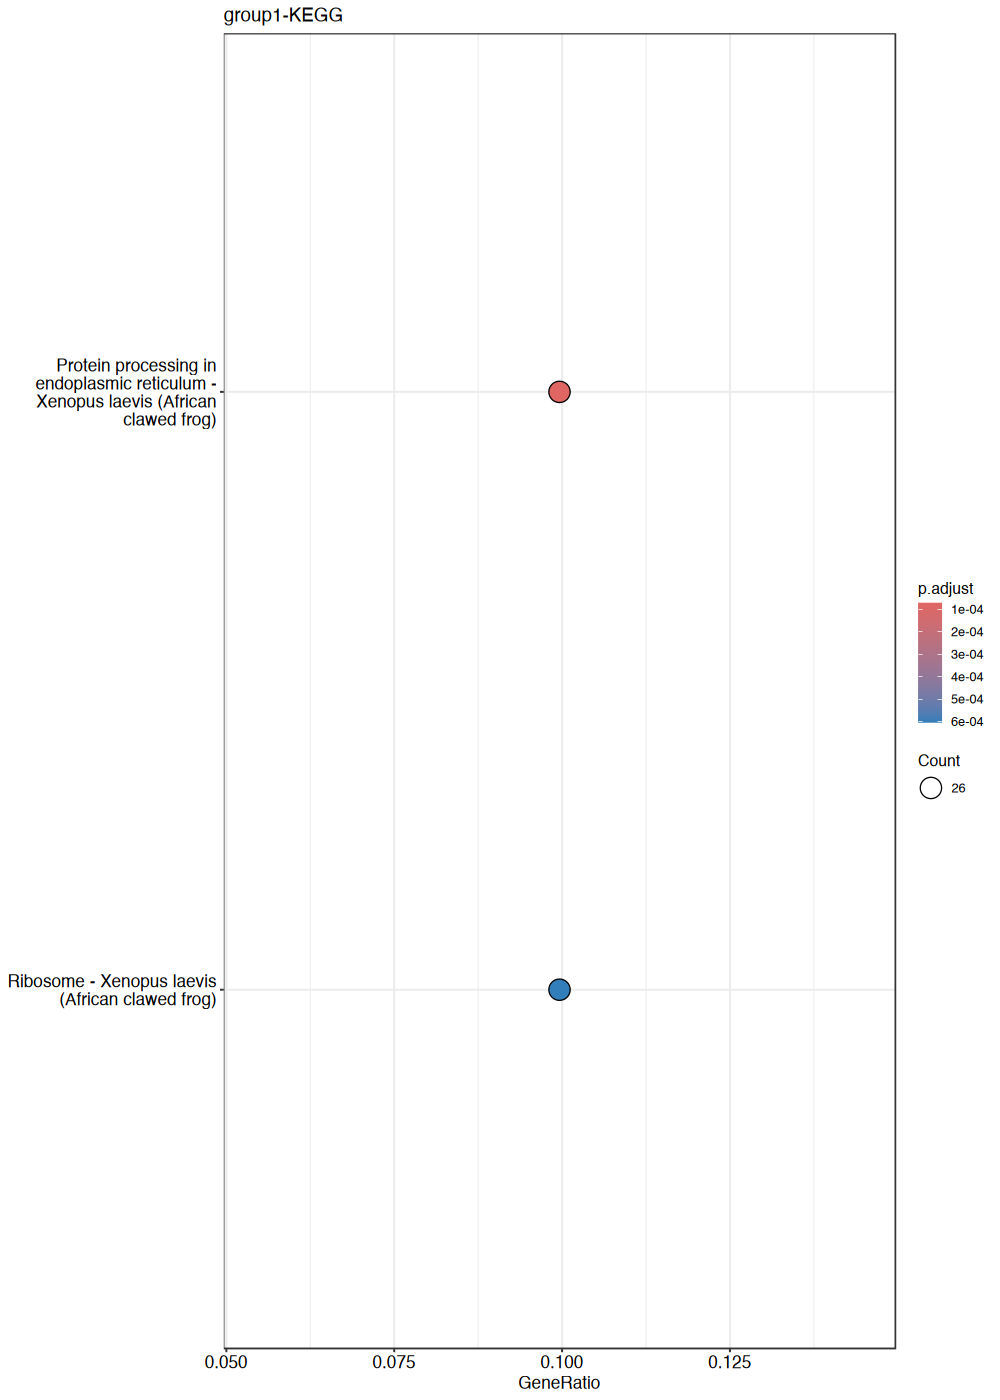

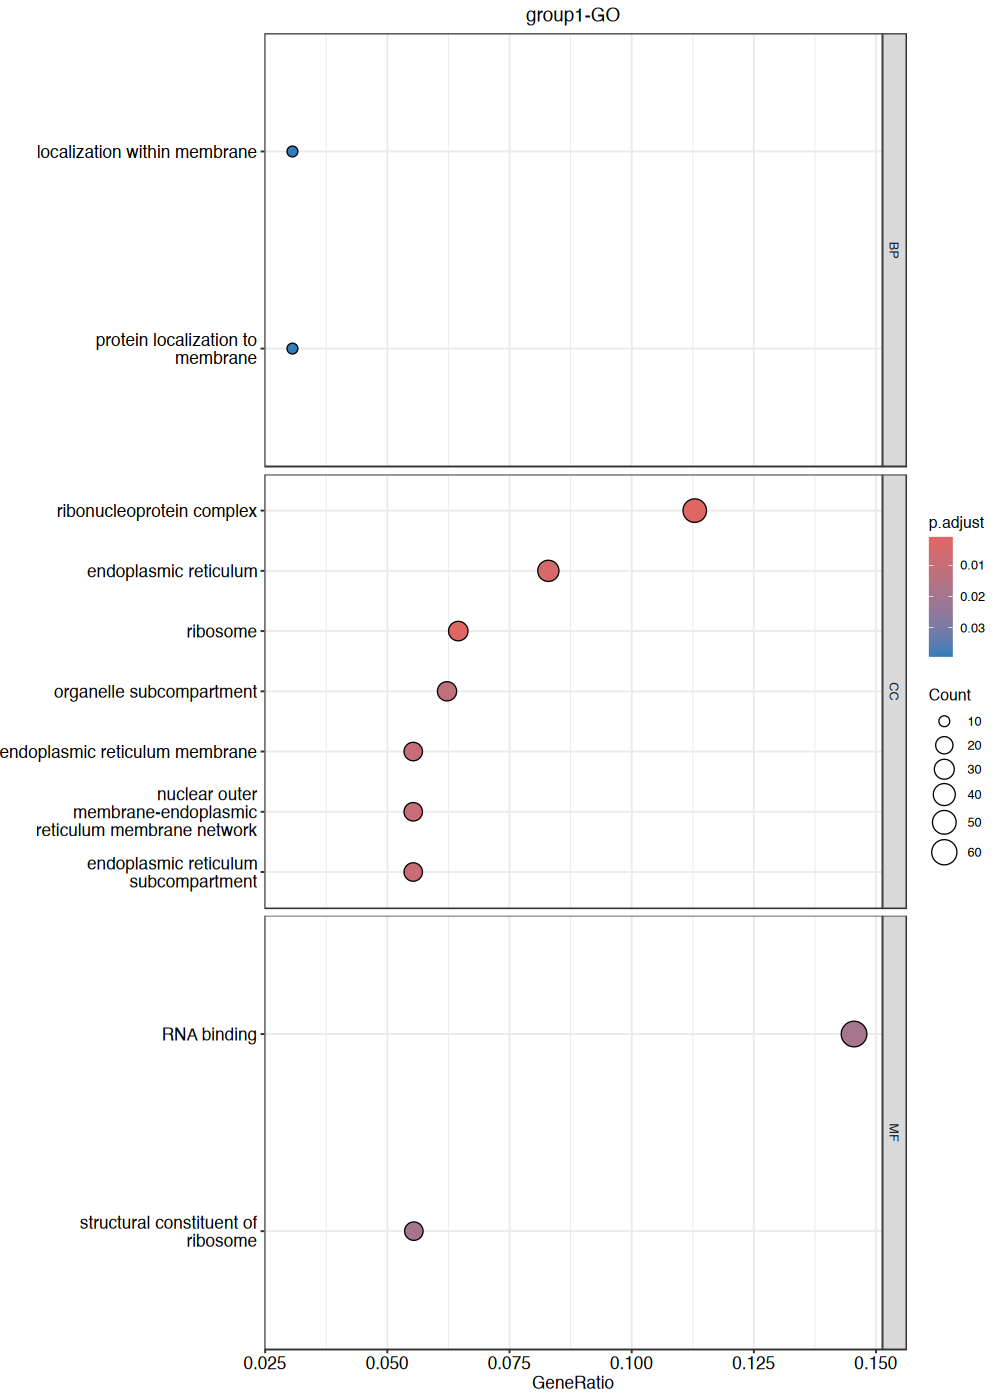

In [39]:
options(repr.plot.width = 10, repr.plot.height = 14, repr.plot.res = 100)
library(ggplot2)
p1<-dotplot(ans.go, split="ONTOLOGY", showCategory=20) + facet_grid(ONTOLOGY~., scale="free")+ ggtitle("group1-GO") +
  theme(plot.title = element_text(hjust = 0.5))
dotplot(ans.kegg, showCategory=20) + ggtitle("group1-KEGG")

p1

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(edge = your_value)' instead of 'colorEdge'.
 The colorEdge parameter will be removed in the next version.”


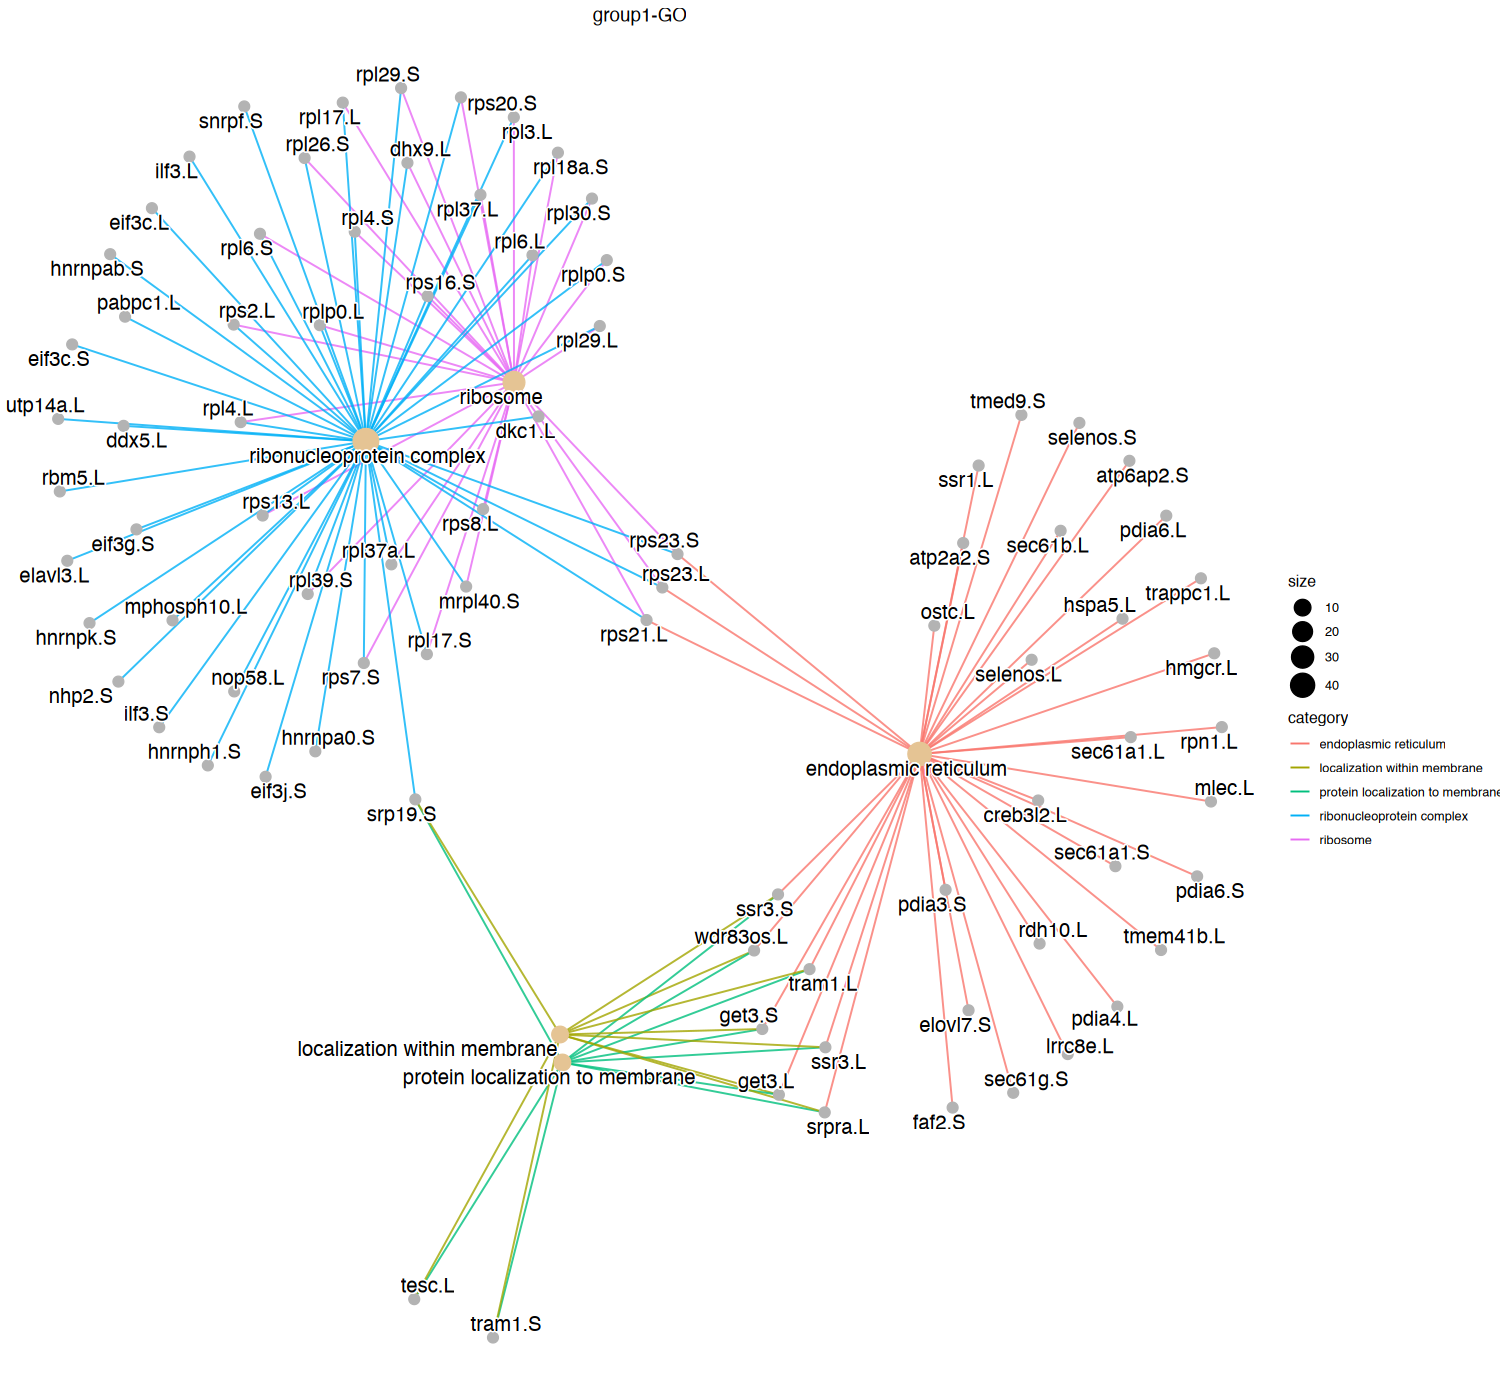

In [40]:
options(repr.plot.width = 15, repr.plot.height = 14, repr.plot.res = 100)


p2 <- enrichplot::cnetplot(ans.go,circular=FALSE,colorEdge = TRUE)+ ggtitle("group1-GO")+
  theme(plot.title = element_text(hjust = 0.5))#基因-通路关联网络图
p2

## Group 2

In [41]:
sum(!is.na(group_2_genes_name$sy_ENTREZID))

[1] 347

In [42]:
ans.go <- enrichGO(gene = group_2_genes_name$sy_ENTREZID, ont = "ALL",
                   OrgDb ="org.Xl.eg.db",
                   universe = background$sy_ENTREZID,
                   readable=TRUE,
                   pvalueCutoff = 0.05)
tab.go <- as.data.frame(ans.go)
tab.go<- subset(tab.go, Count>5)
tab.go

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0048583,BP,GO:0048583,regulation of response to stimulus,28/193,67/1091,1.495032e-06,0.0005935279,0.0004736892,spry2.L/spry1.S/akap12.L/spry2.S/gpc4.L/sox3.S/spry4.L/traf4.L/wnt11b.L/rnf168.L/spred1.L/wnt5b.S/znf703.S/pou5f3.2.L/axin2.L/spry1.L/c9.L/socs4.S/macir.L/sesn2.L/ctnnbip1.S/socs1.L/sesn1.L/sulf1.L/sfrp2.S/ddit4.L/sox18.S/aplnr.S,28
GO:0009790,BP,GO:0009790,embryo development,24/193,58/1091,1.139656e-05,0.0012660311,0.0010104079,wnt8a.L/sox3.L/cirbp.S/sox3.S/zic3.L/ror2.L/tbxt.S/wnt11b.L/wnt5b.S/pou5f3.2.L/id3.L/foxd4l1.1.S/ventx1.L/hes4.L/foxd4l1.1.L/flrt3.S/zic1.L/zic5.L/ventx1.2.S/not.S/zic2.L/sulf1.L/aplnr.S/id3.S,24
GO:0009966,BP,GO:0009966,regulation of signal transduction,25/193,62/1091,1.275598e-05,0.0012660311,0.0010104079,spry2.L/spry1.S/akap12.L/spry2.S/gpc4.L/sox3.S/spry4.L/traf4.L/wnt11b.L/spred1.L/wnt5b.S/znf703.S/pou5f3.2.L/axin2.L/spry1.L/socs4.S/sesn2.L/ctnnbip1.S/socs1.L/sesn1.L/sulf1.L/sfrp2.S/ddit4.L/sox18.S/aplnr.S,25
GO:0010646,BP,GO:0010646,regulation of cell communication,25/193,62/1091,1.275598e-05,0.0012660311,0.0010104079,spry2.L/spry1.S/akap12.L/spry2.S/gpc4.L/sox3.S/spry4.L/traf4.L/wnt11b.L/spred1.L/wnt5b.S/znf703.S/pou5f3.2.L/axin2.L/spry1.L/socs4.S/sesn2.L/ctnnbip1.S/socs1.L/sesn1.L/sulf1.L/sfrp2.S/ddit4.L/sox18.S/aplnr.S,25
GO:0023051,BP,GO:0023051,regulation of signaling,25/193,63/1091,1.787801e-05,0.0014195142,0.0011329014,spry2.L/spry1.S/akap12.L/spry2.S/gpc4.L/sox3.S/spry4.L/traf4.L/wnt11b.L/spred1.L/wnt5b.S/znf703.S/pou5f3.2.L/axin2.L/spry1.L/socs4.S/sesn2.L/ctnnbip1.S/socs1.L/sesn1.L/sulf1.L/sfrp2.S/ddit4.L/sox18.S/aplnr.S,25
GO:0007154,BP,GO:0007154,cell communication,54/193,198/1091,1.291695e-04,0.0059331392,0.0047351847,ngfr.L/ngfr.S/wnt5b.L/rab40b.L/wnt8a.L/spry2.L/spry1.S/akap12.L/lsp1.S/spry2.S/gpc4.L/sox3.S/rhebl1.S/spry4.L/sema3f.L/traf4.L/ror2.L/wnt11b.L/gja7.S/spred1.L/diras3.L/wnt5b.S/znf703.S/dlc1.L/pou5f3.2.L/jag1.L/gjc2.L/axin2.L/spry1.L/nrarp.S/ventx1.L/hes4.L/kremen2.S/socs4.S/flrt3.S/arhgap36.L/sesn2.L/cdkn1a.L/ctnnbip1.S/socs1.L/ventx1.2.S/ndrg2.S/sesn1.L/sulf1.L/sfrp2.S/rhebl1.L/zfp36l2.S/ddit4.L/sox18.S/p2ry1.L/ddr1.L/p2ry2.S/fzd7.S/aplnr.S,54
GO:0045892,BP,GO:0045892,negative regulation of DNA-templated transcription,18/193,43/1091,1.319367e-04,0.0059331392,0.0047351847,sox3.L/zeb2.S/sox3.S/ror2.L/wnt11b.L/rnf168.L/znf703.S/pou5f3.2.L/id3.L/foxd4l1.1.S/ventx1.L/hes4.L/foxd4l1.1.L/ventx1.2.S/not.S/zic2.L/hexim1.L/id3.S,18
GO:1902679,BP,GO:1902679,negative regulation of RNA biosynthetic process,18/193,43/1091,1.319367e-04,0.0059331392,0.0047351847,sox3.L/zeb2.S/sox3.S/ror2.L/wnt11b.L/rnf168.L/znf703.S/pou5f3.2.L/id3.L/foxd4l1.1.S/ventx1.L/hes4.L/foxd4l1.1.L/ventx1.2.S/not.S/zic2.L/hexim1.L/id3.S,18
GO:0045934,BP,GO:0045934,negative regulation of nucleobase-containing compound metabolic process,19/193,47/1091,1.494494e-04,0.0059331392,0.0047351847,sox3.L/cirbp.S/zeb2.S/sox3.S/ror2.L/wnt11b.L/rnf168.L/znf703.S/pou5f3.2.L/id3.L/foxd4l1.1.S/ventx1.L/hes4.L/foxd4l1.1.L/ventx1.2.S/not.S/zic2.L/hexim1.L/id3.S,19


In [43]:
ans.kegg <- enrichKEGG(gene = group_2_genes_name$sy_ENTREZID,
                       organism = 'xla',
                       keyType = "ncbi-geneid",##Xenopus laevis (African clawed frog)
                       universe = background$sy_ENTREZID,
                       
                       pvalueCutoff = 0.05)
tab.kegg <- as.data.frame(ans.kegg)
tab.kegg<- subset(tab.kegg, Count>5)
tab.kegg

Reading KEGG annotation online: "https://rest.kegg.jp/conv/ncbi-geneid/xla"...



category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


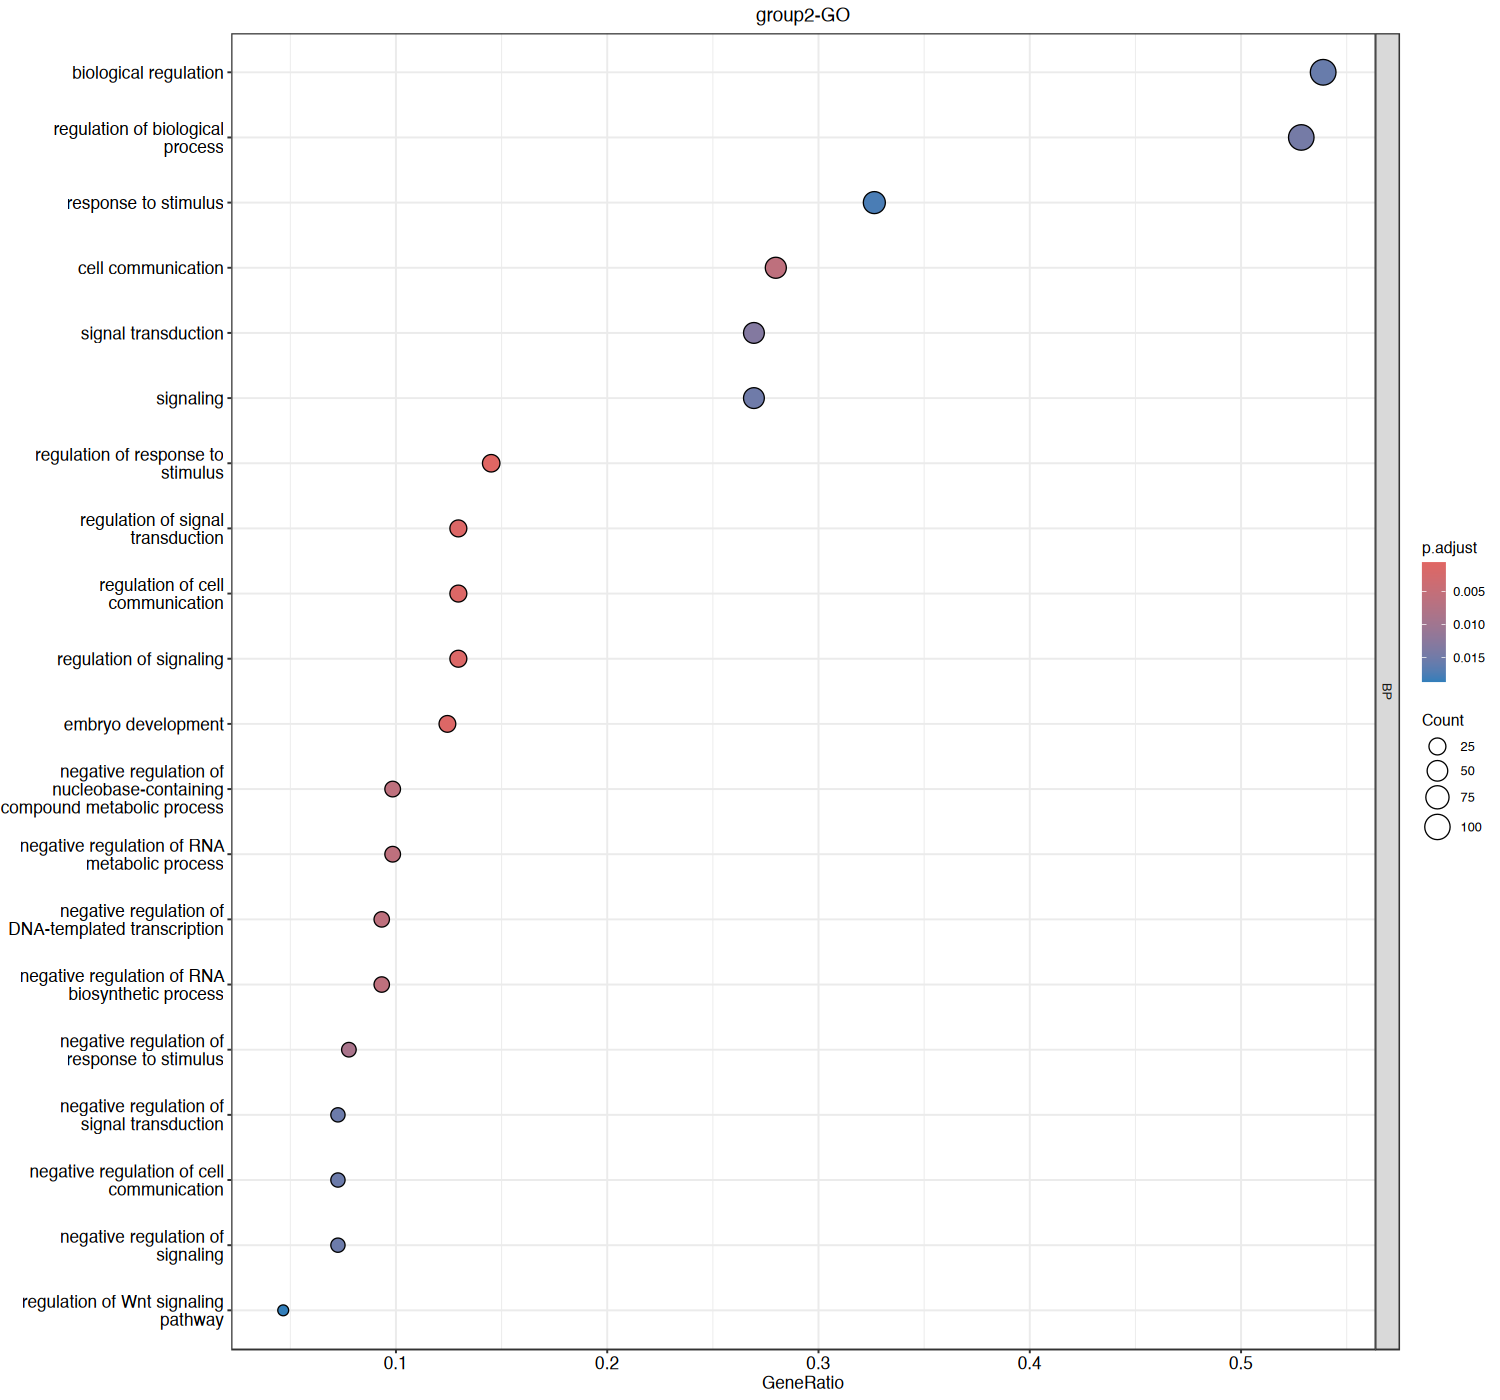

In [44]:
p3 <- dotplot(ans.go, split="ONTOLOGY", showCategory=20) + facet_grid(ONTOLOGY~., scale="free")+ ggtitle("group2-GO") +
  theme(plot.title = element_text(hjust = 0.5))
p3
#p2 <- dotplot(ans.kegg, showCategory=20) + ggtitle("group2-KEGG")
options(repr.plot.width = 10, repr.plot.height = 11, repr.plot.res = 100)

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(edge = your_value)' instead of 'colorEdge'.
 The colorEdge parameter will be removed in the next version.”


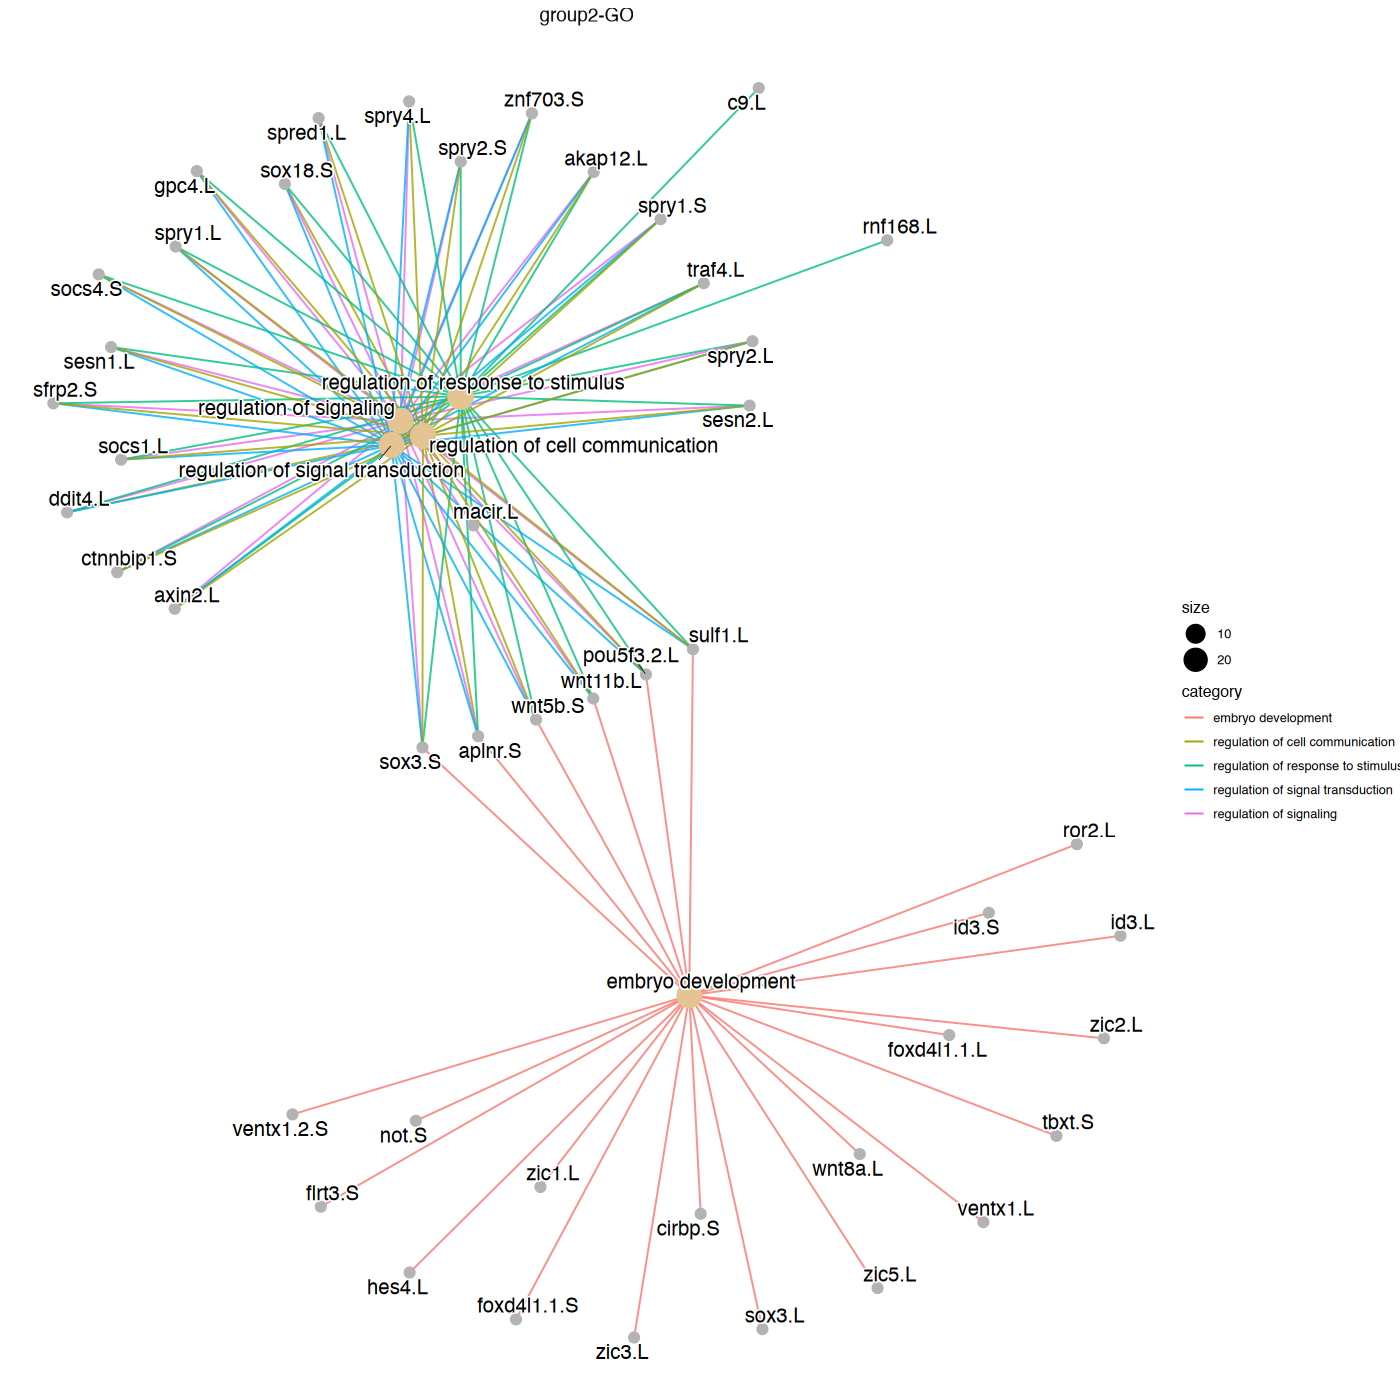

In [45]:
options(repr.plot.width = 14, repr.plot.height = 14, repr.plot.res = 100)


p4<- enrichplot::cnetplot(ans.go,circular=FALSE,colorEdge = TRUE)+ ggtitle("group2-GO")+
  theme(plot.title = element_text(hjust = 0.5))
p4

# verify whether on and off memory genes are enriched in these two groups of genes

In [46]:
library(readr)

In [47]:
on_gene <- read_delim("on_&_off_gene/scON_cluster_9.csv", delim=";")
on_gene$log2FoldChange <- as.numeric(chartr(",", ".", on_gene$log2FoldChange))
on_gene$padj <- as.numeric(chartr(",", ".", on_gene$padj))
colnames(on_gene)[1] <- "gene_name"


off_gene <- read_delim("on_&_off_gene/scOFF_cluster_9.csv", delim=";")
off_gene$padj <- as.numeric(chartr(",", ".", off_gene$padj))
colnames(off_gene)[1] <- "gene_name"

New names:
• `` -> `...1`
Rows: 298 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): ...1, log2FoldChange, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 327 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (2): ...1, padj
num (1): log2FoldChange

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [48]:
length(on_gene$gene_name)

[1] 298

In [49]:
length(group_1_genes_name$Alias)

[1] 782

In [50]:
count = 0
for (a in 1:length(on_gene$gene_name)) {
    for (b in 1:length(group_1_genes_name$Alias)) {
        if (on_gene$gene_name[a] == group_1_genes_name$Alias[b]){
            #print(paste(b,":",group_1_genes_name$Alias[b], " - found"))
            count = count + 1
            break
            }
        }
}
print(paste("found", count,"group 1 genes in",length(on_gene$gene_name),"on-genes, group 1 has",length(group_1_genes_name$Alias),'genes' ))

count = 0
for (a in 1:length(off_gene$gene_name)) {
    for (b in 1:length(group_1_genes_name$Alias)) {
        if (off_gene$gene_name[a] == group_1_genes_name$Alias[b]){
            #print(paste(b,":",group_1_genes_name$Alias[b], " - found"))
            count = count + 1
            break
            }
        }
}
print(paste("found", count,"group 1 genes in", length(off_gene$gene_name),"off-genes, group 1 has",length(group_1_genes_name$Alias),'genes' ))

[1] "found 0 group 1 genes in 298 on-genes, group 1 has 782 genes"
[1] "found 180 group 1 genes in 327 off-genes, group 1 has 782 genes"


In [51]:
count = 0
for (a in 1:length(on_gene$gene_name)) {
    for (b in 1:length(group_2_genes_name$Alias)) {
        if (on_gene$gene_name[a] == group_2_genes_name$Alias[b]){
            #print(paste(b,":",group_2_genes_name$Alias[b], " - found"))
            count = count + 1
            break
            }
        }
}
print(paste("found", count,"group 2 genes in",length(on_gene$gene_name),"on-genes, group 2 has",length(group_2_genes_name$Alias),'genes' ))

count = 0
for (a in 1:length(off_gene$gene_name)) {
    for (b in 1:length(group_2_genes_name$Alias)) {
        if (off_gene$gene_name[a] == group_2_genes_name$Alias[b]){
            #print(paste(b,":",group_2_genes_name$Alias[b], " - found"))
            count = count + 1
            break
            }
        }
}
print(paste("found", count,"group 2 genes in",length(off_gene$gene_name),"off-genes, group 2 has",length(group_2_genes_name$Alias),'genes' ))

[1] "found 85 group 2 genes in 298 on-genes, group 2 has 424 genes"
[1] "found 0 group 2 genes in 327 off-genes, group 2 has 424 genes"


# Fisher's Exact Test

In [57]:
# Create the contingency table
contingency_table <- matrix(c(0, 85, 213, 180, 0, 147, 602, 339, 1035),
                            nrow = 3,
                            dimnames = list(Guess = c("Group 1", "Group 2", "rest"),
                                            Truth = c("On-genes", "Off-genes", "others")))

# Perform Fisher's exact test for each pair of categories
# Pair 1: Group 1 vs. group 2, H: On and off and others genes have significant difference betwen group 1 and 2
result_1 <- fisher.test(contingency_table[1:2,])

# Pair 2: Group 1 vs. others, H: On and off and others genes have significant difference betwen group 1 and 

Pair_2 <- matrix(c(0, 85+ 213, 180, 0+ 147, 602, 339+ 1035),
                            nrow = 2,
                            dimnames = list(Guess = c("Group 1", "rest"),
                                            Truth = c("On-genes", "Off-genes", "others")))

result_2 <- fisher.test(Pair_2)

# Pair 3: Group 2  vs. others

Pair_3 <-  matrix(c( 85, 213, 0, 180+ 147, 339,602+ 1035),
                            nrow = 2,
                            dimnames = list(Guess = c("Group 2", "rest"),
                                            Truth = c("On-genes", "Off-genes", "others")))



result_3 <- fisher.test(Pair_3)

# Combine the results into a data frame for better presentation
results <- data.frame(
  Pair = c("Group 1 vs. Group 2","Group 1 vs. rest","Group 2 vs rest"),
  p_value = c(result_1$p.value, result_2$p.value, result_3$p.value)
)

# Display the results
contingency_table
contingency_table[1:2,]
Pair_2
Pair_3
print(results)



,On-genes,Off-genes,others
Group 1,0,180,602
Group 2,85,0,339
rest,213,147,1035


,On-genes,Off-genes,others
Group 1,0,180,602
Group 2,85,0,339


,On-genes,Off-genes,others
Group 1,0,180,602
rest,298,147,1374


,On-genes,Off-genes,others
Group 2,85,0,339
rest,213,327,1637


                 Pair      p_value
1 Group 1 vs. Group 2 8.905450e-72
2    Group 1 vs. rest 4.670348e-65
3     Group 2 vs rest 2.475723e-31


# chisq.test

In [58]:
# Create the contingency table
contingency_table <- matrix(c(0, 85, 213, 180, 0, 147, 602, 339, 1035),
                            nrow = 3,
                            dimnames = list(Guess = c("Group 1", "Group 2", "rest"),
                                            Truth = c("On-genes", "Off-genes", "others")))

# Perform Fisher's exact test for each pair of categories
# Pair 1: Group 1 vs. group 2, H: On and off and others genes have significant difference betwen group 1 and 2
result_1 <- chisq.test(contingency_table[1:2,])

# Pair 2: Group 1 vs. others, H: On and off and others genes have significant difference betwen group 1 and 

Pair_2 <- matrix(c(0, 85+ 213, 180, 0+ 147, 602, 339+ 1035),
                            nrow = 2,
                            dimnames = list(Guess = c("Group 1", "rest"),
                                            Truth = c("On-genes", "Off-genes", "others")))

result_2 <- chisq.test(Pair_2)

# Pair 3: Group 2  vs. others

Pair_3 <-  matrix(c( 85, 213, 0, 180+ 147, 339,602+ 1035),
                            nrow = 2,
                            dimnames = list(Guess = c("Group 2", "rest"),
                                            Truth = c("On-genes", "Off-genes", "others")))



result_3 <- chisq.test(Pair_3)

# Combine the results into a data frame for better presentation
results <- data.frame(
  Pair = c("Group 1 vs. Group 2","Group 1 vs. rest","Group 2 vs rest"),
  p_value = c(result_1$p.value, result_2$p.value, result_3$p.value)
)

# Display the results
contingency_table
contingency_table[1:2,]
Pair_2
Pair_3
print(results)


,On-genes,Off-genes,others
Group 1,0,180,602
Group 2,85,0,339
rest,213,147,1035


,On-genes,Off-genes,others
Group 1,0,180,602
Group 2,85,0,339


,On-genes,Off-genes,others
Group 1,0,180,602
rest,298,147,1374


,On-genes,Off-genes,others
Group 2,85,0,339
rest,213,327,1637


                 Pair      p_value
1 Group 1 vs. Group 2 4.987303e-56
2    Group 1 vs. rest 1.186204e-49
3     Group 2 vs rest 7.181067e-22


In [59]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Monterey 12.3

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Berlin
tzcode source: internal

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] readr_2.1.4            ggplot2_3.4.4          cowplot_1.1.1         
 [4] enrichplot_1.22.0      clusterProfiler_4.10.0 DT_0.30               
 [7] IRdisplay_1.1          dplyr_1.1.3            limma_3.58.1          
[10] org.Xl.eg.db_3.18.0    AnnotationDbi_1.64.1   IRanges_2.36.0        
[13] S4Vectors_0.40.1       Biobase_2.62.0         BiocGenerics_0.48.1   

loaded via a namespace (and